In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
np.random.seed(1)

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [4]:
df = pd.read_csv("AirlineTweets.csv")

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
df["text"]

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [8]:
df["airline_sentiment"]

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [9]:
df = df[["airline_sentiment", "text"]]

In [10]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [11]:
df["airline_sentiment"].describe()

count        14640
unique           3
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [12]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:>

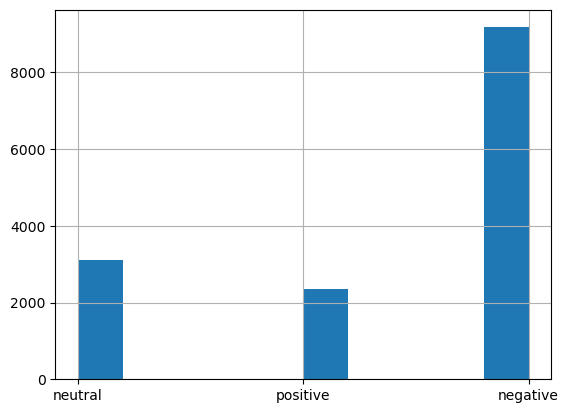

In [13]:
df["airline_sentiment"].hist()

In [14]:
target_map = {"negative":0, "positive":1, "neutral":2}
df["target"] = df["airline_sentiment"].map(target_map)

In [15]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [16]:
train, test = train_test_split(df)

In [17]:
train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [18]:
test.head()

,airline_sentiment,text,target
8515,positive,@JetBlue I'll pass along the advice. You guys ...,1
3439,negative,@united I sent you a dm with my file reference...,0
6439,positive,@SouthwestAir Black History Commercial is real...,1
5112,negative,@SouthwestAir why am I still in Baltimore?! @d...,0
5645,positive,@SouthwestAir SEA to DEN. South Sound Volleyba...,1


In [19]:
vectorizer = TfidfVectorizer(max_features=2000)

In [20]:
X_train = vectorizer.fit_transform(train["text"])

In [21]:
X_test = vectorizer.transform(test["text"])

In [22]:
print(X_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
print(X_test.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.32543236 0.24405454 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [24]:
y_train = train["target"]
y_test = test["target"]

In [25]:
model = LogisticRegression(max_iter=50000)
model.fit(X_train, y_train) 

LogisticRegression(max_iter=50000)

In [26]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.854735883424408
Testing Accuracy: 0.7991803278688525


In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([1, 0, 1, ..., 0, 0, 2], dtype=int64)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2291
           1       0.82      0.64      0.72       595
           2       0.68      0.53      0.60       774

    accuracy                           0.80      3660
   macro avg       0.78      0.70      0.73      3660
weighted avg       0.79      0.80      0.79      3660



In [30]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test) 

In [31]:
Pr_train

array([[0.83748855, 0.06940554, 0.09310591],
       [0.94873565, 0.02716209, 0.02410227],
       [0.94593973, 0.01028956, 0.0437707 ],
       ...,
       [0.00803308, 0.9562905 , 0.03567641],
       [0.26192581, 0.44080657, 0.29726762],
       [0.98795924, 0.00445402, 0.00758674]])

In [32]:
print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class="ovo"))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class="ovo"))

Train AUC: 0.9431006589265122
Test AUC: 0.8954032881964459


In [33]:
print(confusion_matrix(y_test, predictions, normalize='true'))

[[0.93059799 0.01658664 0.05281536]
 [0.24537815 0.63865546 0.11596639]
 [0.40826873 0.05813953 0.53359173]]


<AxesSubplot:>

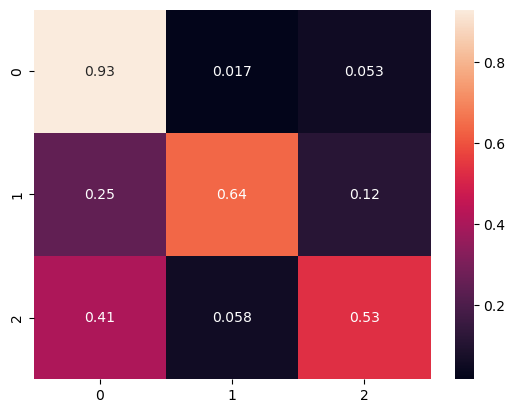

In [34]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, xticklabels=True)

<h4>Remove Neutral </h4>

In [35]:
df_train = train[train["target"]!=2]
df_test = test[test["target"]!=2]

In [43]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [44]:
df_train["target"].value_counts()

0    6887
1    1768
Name: target, dtype: int64

In [45]:
df_test["target"].value_counts()

0    2291
1     595
Name: target, dtype: int64

In [46]:
Y_train = df_train["target"]
Y_test = df_test["target"]

In [47]:
X_train = vectorizer.fit_transform(df_train["text"])
X_test = vectorizer.transform(df_test["text"])

In [48]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:

model = LogisticRegression(max_iter=500)


In [50]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [51]:
print("Training Accuracy:", model.score(X_train, Y_train))
print("Testing Accuracy:", model.score(X_test, Y_test))

Training Accuracy: 0.9300982091276718
Testing Accuracy: 0.9147609147609148


In [52]:
predictions = model.predict(X_test)

In [53]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2291
           1       0.92      0.65      0.76       595

    accuracy                           0.91      2886
   macro avg       0.92      0.82      0.85      2886
weighted avg       0.91      0.91      0.91      2886



In [54]:
#ROC-AUC

PR_train = model.predict_proba(X_train)[:,1]
PR_test = model.predict_proba(X_test)[:,1]
print("Train AUC:", roc_auc_score(Y_train, PR_train))
print("Test AUC:", roc_auc_score(Y_test, PR_test))

Train AUC: 0.9790315809115082
Test AUC: 0.9533010061292087


<h4>Interpreting</h4>

In [55]:
model.coef_

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

In [59]:
model.coef_.shape

(1, 2000)

(array([  2.,   0.,   2.,   3.,   2.,  12.,  25.,  60., 183., 776., 550.,
        227.,  86.,  44.,  11.,   2.,   2.,   4.,   2.,   1.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.23787117, -3.82467728, -3.41148339, -2.9982895 , -2.58509561,
        -2.17190172, -1.75870783, -1.34551394, -0.93232006, -0.51912617,
        -0.10593228,  0.30726161,  0.7204555 ,  1.13364939,  1.54684328,
         1.96003717,  2.37323105,  2.78642494,  3.19961883,  3.61281272,
         4.02600661,  4.4392005 ,  4.85239439,  5.26558827,  5.67878216,
         6.09197605,  6.50516994,  6.91836383,  7.33155772,  7.74475161,
         8.1579455 ]),
 <BarContainer object of 30 artists>)

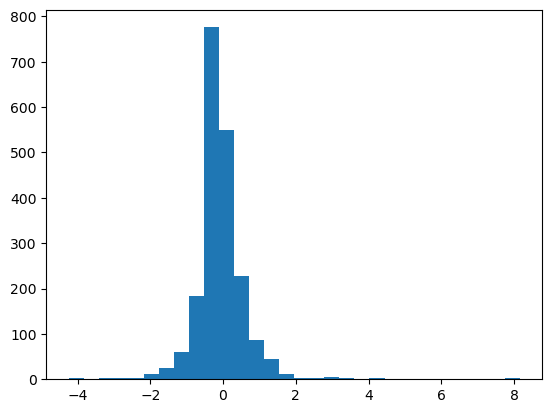

In [56]:
plt.hist(model.coef_[0], bins=30)

In [58]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1849,
 'change': 338,
 'made': 1087,
 'in': 938,
 'just': 989,
 'over': 1271,
 'hours': 903,
 'for': 745,
 'something': 1619,
 'that': 1737,
 'should': 1575,
 'have': 851,
 'taken': 1711,
 'online': 1246,
 'am': 139,
 'not': 1213,
 'loved': 1076,
 'the': 1739,
 'agent': 112,
 'though': 1755,
 'door': 568,
 'to': 1775,
 'half': 826,
 'into': 964,
 'plane': 1334,
 'seat': 1535,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1591,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1266,
 'of': 1227,
 'delayed': 497,
 'flights': 728,
 'you': 1993,
 'suck': 1682,
 'and': 148,
 'getting': 793,
 'worse': 1971,
 'fair': 670,
 'usairways': 1868,
 'stuck': 1677,
 'need': 1191,
 'reflight': 1438,
 'booking': 270,
 'problems': 1380,
 'next': 1199,
 'flight': 717,
 'possibly': 1359,
 'dm': 554,
 'more': 1166,
 'info': 951,
 'southwestair': 1630,
 'got': 810,
 'help': 867,
 'from': 765,
 'nice': 1201,
 'lady': 1007,
 'on': 1241,
 'phone': 1319,
 'thank': 1734,
 'refund': 1439,
 'vo

In [61]:
max(word_index_map.values())

1999

In [63]:
word_weight = {}
threshold = 2 

for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        word_weight[word] = weight 

print(word_weight)


{'southwestair': 2.860075664830715, 'thank': 8.070503978251411, 'great': 5.208733897363029, 'best': 3.636864282516037, 'virginamerica': 3.2284047967743144, 'thx': 2.808325087948863, 'jetblue': 3.021616302483301, 'good': 3.261536914402458, 'thanks': 8.157945495519735, 'love': 4.405152711236884, 'appreciate': 2.929926451119302, 'awesome': 4.054714104267736, 'cool': 2.0881519343394754, 'kudos': 2.6141836318103144, 'amazing': 4.194647955634698, 'worries': 2.7116513041026713, 'wonderful': 2.120412437681552}


In [64]:
negative_word_weight = {}
threshold = 2 

for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        negative_word_weight[word] = weight 

print(negative_word_weight)


{'hours': -3.180120172850759, 'not': -4.237871165125338, 'delayed': -2.704527095981196, 'hour': -2.0696846300822695, 'but': -2.2210484579612495, 'cancelled': -2.677062192859444, 'nothing': -2.0768244801901394, 'what': -2.014376186186892, 'no': -3.970836170668499, 'worst': -3.190035509679462, 'hold': -2.79023154067122, 'why': -2.2269879893924536, 'luggage': -2.162544497772418}


<h4> Find Negative Review Where the Model Output is closest to 1 </h4>

In [69]:
X_test.toarray().shape

(2886, 2000)

In [77]:
Y_test.values

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [78]:
Y_test.values[2]

1

In [76]:
PR_test

array([0.67816671, 0.0272425 , 0.65631993, ..., 0.16207655, 0.05638737,
       0.05292895])

In [79]:
False_positive=[]
for i in range(X_test.toarray().shape[0]):
    if Y_test.values[i] == 0 and PR_test[i] > 0.5:
        False_positive.append(i)
        


In [80]:
print(False_positive)

[36, 96, 222, 333, 412, 557, 593, 640, 780, 818, 999, 1060, 1206, 1249, 1316, 1466, 1711, 1801, 1854, 1901, 1949, 1960, 2054, 2067, 2125, 2128, 2302, 2412, 2457, 2465, 2525, 2565, 2591, 2827, 2851]


In [83]:
for i in False_positive:
    print(df_test["text"].values[i])

@united thanks for that advice, so helpful. Can't believe you guys actually charge people to "fly" united
@SouthwestAir Twitter says I can't DM someone unless they follow me.  Can @SouthwestAir follows my twitter? thanks you.
@SouthwestAir oh, ok!  all good!  looking forward to escaping the cold for a bit!  thanks!
@united thats weak. See ya 👋
Hey @VirginAmerica !!
@JetBlue Thanks for the THIRD gate change http://t.co/UfBdr5AxeO
@SouthwestAir Im just praying you get me home alive
@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS
@AmericanAir a confirmed flight. I'm so done! Thanks for nothing!
@VirginAmerica on flight VX399 headed to LA from JFK - dirtiest VA plane I have ever been on. Sad for a great airline.
@SouthwestAir thank you for Cancelled Flighting my flight, last minute of course, to #GIS2015. I'm now missing one full day of my trip thanks to this!
@united good try but @SouthwestAir got her here safer

<h4> Find Positive Review Where the Model Output is closest to 0 </h4>

In [84]:
False_negative=[]
for i in range(X_test.toarray().shape[0]):
    if Y_test.values[i] == 1 and PR_test[i] < 0.5:
        False_negative.append(i)

for i in False_negative:
    print(df_test["text"].values[i])   


@SouthwestAir Making Miracles again! The customer service department gave me by far one of the friendliest phone calls ever. #wheelsup
Thank you United! “@united: @dan_roam That's a beautiful place to stay a day longer. Have you been re-booked? If not, let me know. ^MN”
@AmericanAir @beantownmatty Sounds like a date!
.@AmericanAir @TyWinter it's really the small things--the details--that make an excellent experience or a really irritating one.
@USAirways see you on board tomorrow
@united one lady helping the 12 of us with luggage
@AmericanAir yes called your UK number on skype…well worth the $.50.  i recommend others do the same.
@united have reported it.  Still in Istanbul at the moment apparently.  On the other plane haha.  Hats off to the pilot!
@AmericanAir I might look into that. My wife travels much more than I do. Could we both use the membership?
@USAirways Well I did miss it. But gate agents had rebooked boarding pass waiting when I landed. Time for lunch &amp; a beverage. Eas